# TITANIC

using pipeline and Random Search, The Goal is to achieve 90% accuracy model.

## Import Libraries

In [1]:
import pandas as pd  # for data processing
import numpy as np   # for linear algebra

import seaborn as sns # for visualization
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Algorithms
from sklearn.ensemble import RandomForestClassifier

## Get Datasets

In [2]:
test = pd.read_csv("./datasets/test.csv")
train = pd.read_csv("./datasets/train.csv")

print(test.shape)
print(train.shape)

(418, 11)
(891, 12)


## Explore Datasets

In [3]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# about missing datasets
total = train.isnull().sum().sort_values(ascending=False)
ratio = (train.isnull().sum() / train.isnull().count() * 100).sort_values(ascending=False)

missing_data = pd.concat([total, ratio], axis=1, keys=['Total', 'Ratio'])
missing_data.head(3)


,Total,Ratio
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467


In [7]:
print(train.columns.values)
# PassengerId, Ticket, Name seems to be unrelated to the survival rate

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


### Age and Sex

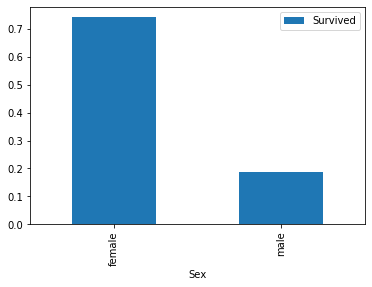

In [8]:
sex_pivot = train.pivot_table(index="Sex", values="Survived")
sex_pivot.plot.bar()
plt.show()

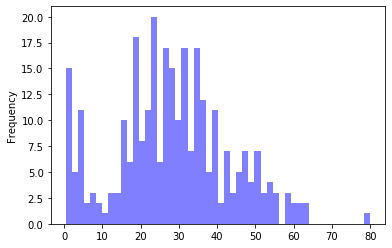

In [9]:
# total survivors according to age
survived = train[train["Survived"] == 1]
survived["Age"].plot.hist(alpha=0.5, color='blue', bins=50)
plt.show()

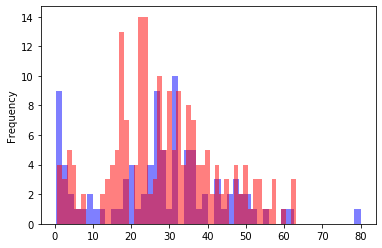

In [10]:
# total survivors according to age & sex (blue = male, red = female)
survived_male = survived[survived["Sex"] == 'male']
survived_female = survived[survived["Sex"] == 'female']

survived_male["Age"].plot.hist(alpha=0.5, color='blue', bins=50)
survived_female["Age"].plot.hist(alpha=0.5, color='red', bins=50)
plt.show()

### PClass & Sex

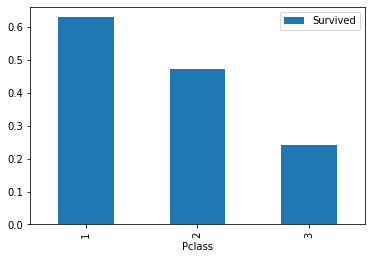

In [11]:
pclass_pivot = train.pivot_table(index = "Pclass", values="Survived")
pclass_pivot.plot.bar()
plt.show()

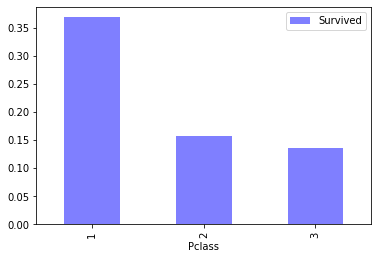

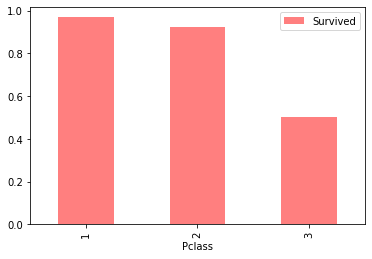

In [12]:
# according to gender
train_male = train[train["Sex"] == 'male']
train_female = train[train["Sex"] == 'female']

male_pclass_pivot = train_male.pivot_table(index="Pclass", values="Survived")
female_pclass_pivot = train_female.pivot_table(index="Pclass", values="Survived")

male_pclass_pivot.plot.bar(alpha=0.5, color='blue')
female_pclass_pivot.plot.bar(alpha=0.5, color='red')
plt.show()

## Data Preprocessing

In [29]:
train_temp = train.drop(['PassengerId'], axis=1) 

# missing data

# Cabin
train_temp = train_temp.drop(['Cabin'], axis=1)

# Age
mean = train_temp['Age'].mean()
std = train_temp['Age'].std()
is_null_cnt = train_temp['Age'].isnull().sum()
rand_age = np.random.randint(mean-std, mean+std, size=is_null_cnt)

rand_temp = train_temp['Age'].copy()
rand_temp[np.isnan(rand_temp)] = rand_age
train_temp['Age'] = rand_temp

# Embarked
common_value = 'S'
train_temp['Embarked'] = train_temp['Embarked'].fillna(common_value)

# check dataset
train_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


### Converting existing data

In [30]:
# Fare
train_temp['Fare'] = train_temp['Fare'].fillna(0).astype(int)

# Name convert into title
titles = {"Mr" : 1, "Miss" : 2, "Mrs" : 3, "Master" : 4, "Rare" : 5}
train_temp['Title'] = train_temp.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
train_temp['Title'] = train_temp['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr','Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
train_temp['Title'] = train_temp['Title'].replace('Mlle', 'Miss')
train_temp['Title'] = train_temp['Title'].replace('Ms', 'Miss')
train_temp['Title'] = train_temp['Title'].replace('Mme', 'Mrs')
# convert titles into numbers
train_temp['Title'] = train_temp['Title'].map(titles)
# filling NaN with 0, to get safe
train_temp['Title'] = train_temp['Title'].fillna(0)
train_temp = train_temp.drop(['Name'], axis=1)

# Sex
genders = {"male": 0, "female": 1}
train_temp["Sex"] = train_temp["Sex"].map(genders)

# Ticket (drop)
train_temp = train_temp.drop(['Ticket'], axis=1)

# Embarked
ports = {"S": 0, "C": 1, "Q": 2}
train_temp["Embarked"] = train_temp["Embarked"].map(ports)
print("Done")

Done


### Map Categories to finite sets

In [31]:
# Age
train_temp['Age'] = train_temp['Age'].astype(int)
train_temp.loc[train_temp['Age'] <= 11, 'Age'] = 0
train_temp.loc[(train_temp['Age'] > 11) & (train_temp['Age'] <= 18), 'Age'] = 1
train_temp.loc[(train_temp['Age'] > 18) & (train_temp['Age'] <= 22), 'Age'] = 2
train_temp.loc[(train_temp['Age'] > 22) & (train_temp['Age'] <= 27), 'Age'] = 3
train_temp.loc[(train_temp['Age'] > 27) & (train_temp['Age'] <= 33), 'Age'] = 4
train_temp.loc[(train_temp['Age'] > 33) & (train_temp['Age'] <= 40), 'Age'] = 5
train_temp.loc[(train_temp['Age'] > 40), 'Age'] = 6

train_temp['Age'].value_counts()

6    163
4    156
5    152
3    140
2    114
1     98
0     68
Name: Age, dtype: int64

In [32]:
# Fare
train_temp.loc[train_temp['Fare'] <= 7.91, 'Fare'] = 0
train_temp.loc[(train_temp['Fare'] > 7.91) & (train_temp['Fare'] <= 14.454), 'Fare'] = 1
train_temp.loc[(train_temp['Fare'] > 14.454) & (train_temp['Fare'] <= 31), 'Fare'] = 2
train_temp.loc[(train_temp['Fare'] > 31) & (train_temp['Fare'] <= 99), 'Fare'] = 3
train_temp.loc[(train_temp['Fare'] > 99) & (train_temp['Fare'] <= 250), 'Fare'] = 4
train_temp.loc[(train_temp['Fare'] > 250), 'Fare'] = 5

train_temp['Fare'].value_counts()

0    241
2    223
1    216
3    158
4     44
5      9
Name: Fare, dtype: int64

## Create new Features

In [33]:
# Age times Class
train_temp['Age_Class'] = train_temp['Age'] * train_temp['Pclass']

## Building Machine Learning Models

In [34]:
X_train = train_temp.drop("Survived", axis=1)
y_train = train_temp['Survived']
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Age_Class
0,3,0,2,1,0,0,0,1,6
1,1,1,5,1,0,3,1,3,5
2,3,1,3,0,0,0,0,2,9
3,1,1,5,1,0,3,0,3,5
4,3,0,5,0,0,1,0,1,15


In [35]:
# Random forest
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
print("Score : ", round(clf.score(X_train, y_train)*100, 2))

Score :  91.13


## Cross Validation

In [38]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
print("Cross Val Scores: ", scores)
print("Mean : ", scores.mean())

Cross Val Scores:  [0.72222222 0.80898876 0.75280899 0.84269663 0.87640449 0.83146067
 0.80898876 0.80898876 0.84269663 0.86516854]
Mean :  0.8160424469413234
